## Programming of linear regression and error bars using the example of fluorescein

For the investigation of the linearity of a fluorescent dye, in this case fluorescein is measured at different concentrations at least three times under the same initial conditions using a fluorometer (Fluoroskan Ascent FL). The mean value and standard deviation of the series of measurements are then calculated. The regression line to be determined then visualizes that linear relationship between the measured emission and the concentration. Error bars are created to represent the standard deviation.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# data upload
df = pd.read_csv("example_data/fluorescein_linearity.csv")
df.columns = ['concentration', 'measurement1','measurement2','measurement3']
print(df)

   concentration  measurement1  measurement2  measurement3
0        0.51875       2.32488       2.33126       2.32319
1        1.03750      27.49310      27.46884      27.46912
2        2.07500      97.33784      97.36310      97.47082
3        4.15000     189.76600     189.45400     189.76700
4        8.30000     673.61110     672.09500     671.37620
5       10.00000     791.05520     793.77810     789.41400
6       12.45000     855.49400     851.67500     849.75620
7       16.60000    1390.92000    1387.34400    1396.71000


In [3]:
# calculate average value & standard derivation
average_value = np.array([df['measurement1'],df['measurement2'],df['measurement3']])
df['average value'] = average_value.mean(axis = 0)

standard_derivation = np.array([df['measurement1'],df['measurement2'],df['measurement3']])
df['standard derivation'] = standard_derivation.std(axis = 0)
print(df)

   concentration  measurement1  measurement2  measurement3  average value  \
0        0.51875       2.32488       2.33126       2.32319       2.326443   
1        1.03750      27.49310      27.46884      27.46912      27.477020   
2        2.07500      97.33784      97.36310      97.47082      97.390587   
3        4.15000     189.76600     189.45400     189.76700     189.662333   
4        8.30000     673.61110     672.09500     671.37620     672.360767   
5       10.00000     791.05520     793.77810     789.41400     791.415767   
6       12.45000     855.49400     851.67500     849.75620     852.308400   
7       16.60000    1390.92000    1387.34400    1396.71000    1391.658000   

   standard derivation  
0             0.003475  
1             0.011371  
2             0.057663  
3             0.147314  
4             0.931547  
5             1.799787  
6             2.384881  
7             3.859099  


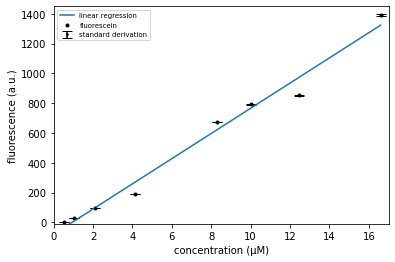

In [4]:
# define variables
x = df['concentration']
y = df['average value']
yerr = df['standard derivation']

# linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# error bars
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=yerr, fmt='.', color='black', ms=3, capsize = 5)

# plot data
plt.scatter('concentration', 'average value', data=df, marker='.', color='black')
plt.ylabel('fluorescence (a.u.)')
plt.xlabel('concentration (µM)')
plt.axis( [0,17,-10,1450])
plt.plot(x, mymodel)
plt.legend(labels=('linear regression','fluorescein','standard derivation'), loc='upper left', fontsize='x-small')
plt.show()